In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [22]:
path = '/Users/fbickfordsmith/Google Drive/Project/attention/'
path_baseline = path+'results/baseline_classwise_acc.csv'
path_trained = path+'results/semcontexts_trained_metrics.csv'
path_contexts = path+'contexts/semcontexts_wnids.csv'
path_synsets = path+'metadata/synsets.txt'

In [14]:
wnids = [line.rstrip('\n') for line in open(path_synsets)]
wnid2ind = {wnid:ind for ind, wnid in enumerate(wnids)}

In [15]:
with open(path_contexts) as f:
    contexts = [row for row in csv.reader(f, delimiter=',')]

In [16]:
df0 = pd.read_csv(path_baseline, index_col=0)

In [17]:
acc0 = []
for c in contexts:
    inds_in = [wnid2ind[w] for w in c]
    inds_out = list(set(range(1000)) - set(inds_in))
    acc0.append([np.mean(df0['accuracy'][inds_in]), np.mean(df0['accuracy'][inds_out])])
acc0 = np.array(acc0)

In [23]:
df1 = pd.read_csv(path_trained, index_col=0) 
df1

,incontext_loss,incontext_acc,incontext_top_k_categorical_accuracy,outofcontext_loss,outofcontext_acc,outofcontext_top_k_categorical_accuracy
0,1.982066,0.535377,0.790684,1.269470,0.689376,0.890744
1,1.177483,0.677077,0.914897,1.442579,0.656369,0.865032
2,1.126235,0.722222,0.932099,1.457855,0.652010,0.861337
3,1.650957,0.610329,0.840376,1.317797,0.679359,0.887297
4,1.013840,0.732434,0.924151,1.487528,0.649133,0.862196
5,0.638271,0.839581,0.947653,1.545734,0.630388,0.859394


In [24]:
import os
path = '/Users/fbickfordsmith/Google Drive/Project/attention/contexts/'
filenames = [f for f in os.listdir(path) if 'imagenet' in f]
for f in filenames:
    df = pd.read_csv(path+f)
    print(f'Found {df.shape[0]} classes in {f}')

Found 35 classes in imagenet_kitchen.csv
Found 129 classes in imagenet_dogs.csv
Found 13 classes in imagenet_cats.csv
Found 57 classes in imagenet_wearable.csv
Found 45 classes in imagenet_landtransport.csv
Found 60 classes in imagenet_birds.csv


In [25]:
acc0[:, 0]

array([0.51288391, 0.66109994, 0.70847724, 0.53538568, 0.71567764,
       0.82463616])

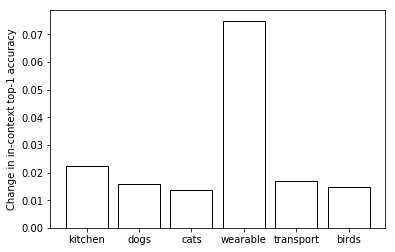

In [26]:
labels = ['kitchen', 'dogs', 'cats', 'wearable', 'transport', 'birds']
plt.bar(labels, df1['incontext_acc']-acc0[:, 0], color='w', edgecolor='black')
plt.ylabel('Change in in-context top-1 accuracy')
# plt.savefig('semcontexts_acc_change.png', dpi=600)
plt.show()

In [10]:
df1['outofcontext_acc']-acc0[:, 1]

0    0.038408
1    0.012451
2    0.006696
3    0.026530
4    0.006275
5   -0.004353
Name: outofcontext_acc, dtype: float64

In [11]:
path_training = '/Users/fbickfordsmith/Google Drive/Project/attention/training/'
num_epochs = [len(pd.read_csv(path_training+f'semcontext{i:02}_training.csv', index_col=0)) for i in range(6)]
num_epochs

[3, 4, 3, 8, 3, 5]

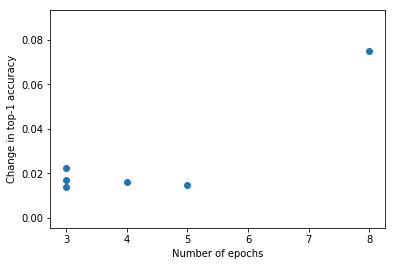

In [12]:
plt.scatter(num_epochs, df1['incontext_acc']-acc0[:, 0])
plt.xlabel('Number of epochs')
plt.ylabel('Change in top-1 accuracy')
plt.show()

In [57]:
pcpt_distances = np.array([[4, 5, 4], [0, 0, 0], [0, 0, 0]])
ind_empty = np.transpose(np.nonzero(
    (pcpt_distances-np.tril(np.ones_like(pcpt_distances), k=-1))==0))

In [58]:
ind_empty

array([[1, 1],
       [1, 2],
       [2, 2]])

In [59]:
i0, j0 = ind_empty[0]

In [61]:
j0

1